In [38]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

In [43]:
state = np.random.RandomState(6669)
villages = np.random.uniform(0, 10, size=(20,2))

In [52]:
station = cp.Variable(3)

obj = cp.Minimize(station[2])

constraints = []
for village in villages:
    constraints.append(cp.SOC(station[2], village-station[:2]))

prob = cp.Problem(obj, constraints)
prob.solve()

print("Station X Location: {}".format(station.value[0]))
print("Station Y Location: {}".format(station.value[1]))
print("Station Minimum Longest Distance: {}".format(prob.value))


Station X Location: 4.880113865176851
Station Y Location: 4.984478423255709
Station Minimum Longest Distance: 5.383116638932085


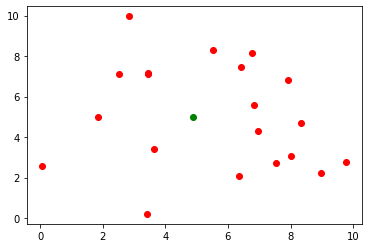

In [45]:
plt.scatter(villages[:, 0], villages[:, 1], color='red')
plt.scatter(station[:1].value, station[1:2].value, c='green')
plt.show()